In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\PCA\PCA\wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


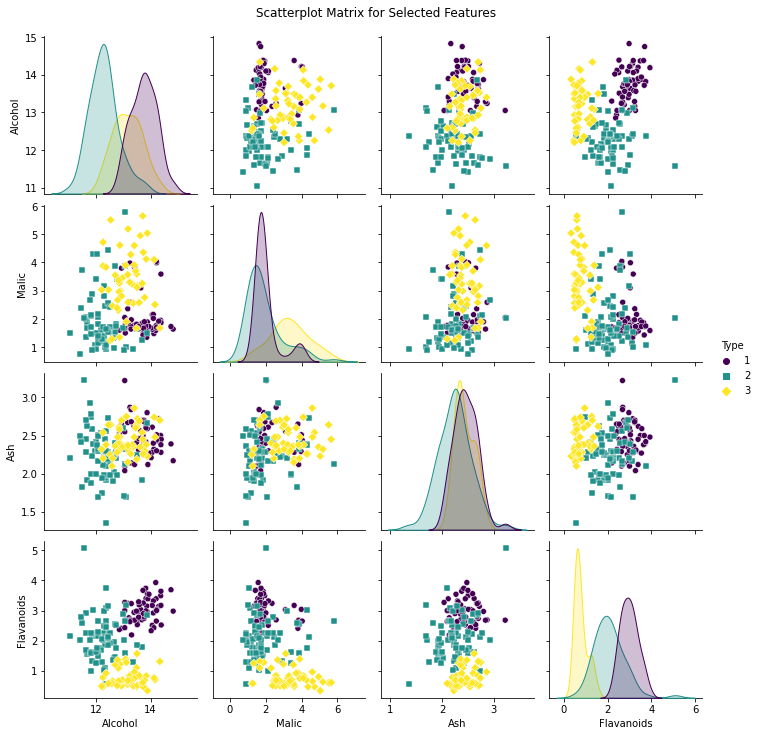

In [7]:
# Pairplot for selected columns
sns.pairplot(df, vars=['Alcohol', 'Malic', 'Ash', 'Flavanoids'], hue='Type', palette='viridis', markers=["o", "s", "D"])
plt.suptitle("Scatterplot Matrix for Selected Features", y=1.02)
plt.show()


In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()


<AxesSubplot:>

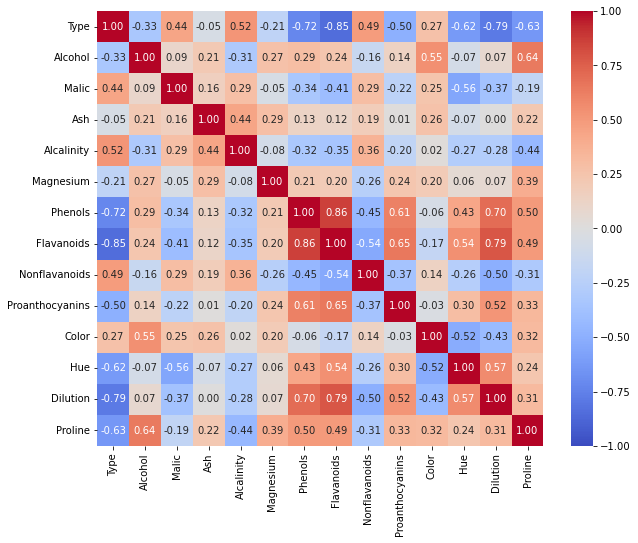

In [9]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show correlation coefficients
    fmt=".2f",   # Format numbers to 2 decimal places
    cmap="coolwarm",  # Color map
    vmin=-1, vmax=1   # Range of values
)

In [10]:
threshold = 0.8
strong_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1)].stack()
print(strong_corr)

Phenols     Flavanoids    0.864564
Flavanoids  Phenols       0.864564
dtype: float64


In [11]:
selected_features = df[['Phenols', 'Flavanoids']]


In [12]:
# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(selected_features)

In [15]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(standardized_features)


In [16]:
pca_result.shape

(178, 2)

In [24]:
# Step 3: Perform KMeans Clustering on PCA data
# You can experiment with different numbers of clusters (k), here I am using k=3 as an example
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_result)
labels = kmeans.labels_


In [25]:
# Step 4: Calculate the Silhouette Score
sil_score = silhouette_score(pca_result, labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.5942213406748447


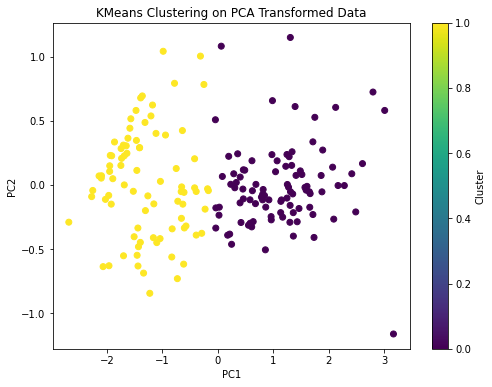

In [26]:
#Step 5: Visualize the clustering results (optional)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering on PCA Transformed Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()



In [32]:
sil_scores = []
for k in range(2, 10):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    labels = kmeans.labels_
    sil_score = silhouette_score(pca_result, labels)
    sil_scores.append(sil_score)


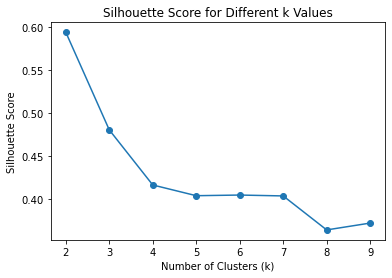

In [33]:

# Plot the silhouette scores for different k values
plt.plot(range(2, 10), sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()


In [34]:

# Print the best k and corresponding silhouette score
best_k = range(2, 10)[sil_scores.index(max(sil_scores))]
print(f"Optimal k: {best_k}, Silhouette Score: {max(sil_scores)}")

Optimal k: 2, Silhouette Score: 0.5942213406748447


In [39]:
selected_features = df.drop(columns=['Type'])  # Assuming 'Type' is the target column or a non-numeric column


In [40]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

In [41]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)



KMeans(n_clusters=3, random_state=42)

In [42]:
#  Get the cluster labels
labels = kmeans.labels_


In [43]:
#  Calculate the Silhouette Score
sil_score = silhouette_score(scaled_features, labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.2848589191898986


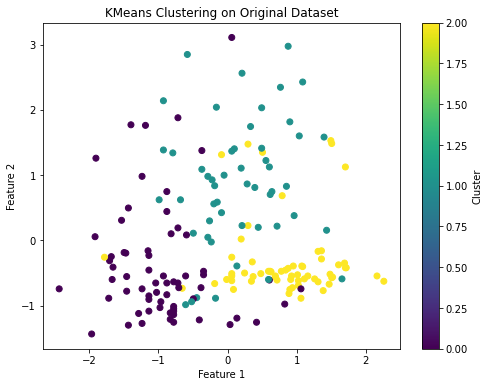

In [44]:

plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering on Original Dataset')
plt.xlabel('Feature 1')  # Replace with the actual feature names
plt.ylabel('Feature 2')  # Replace with the actual feature names
plt.colorbar(label='Cluster')
plt.show()

conclusion :- A score of 0.59 is considered moderate. This indicates that the clusters are fairly well-separated, but there is still some overlap or room for improvement.A score of 0.28 is considered low, indicating that the clusters are less distinct.
Here, we can say that PCA reduces dimentionallity of the dataset and it helps for clustering.